In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('preprocessed.csv')

In [5]:
entropy_means = df[df['income_group'] != 99].groupby(['income_group_label', 'is_buyer'])['category_entropy'].mean().unstack()
print("Average Category Entropy (Buyers vs Non-Buyers):\n")
print(entropy_means.round(3))

Average Category Entropy (Buyers vs Non-Buyers):

is_buyer                0      1
income_group_label              
High                0.001  0.659
Low                 0.001  0.652
Mid                 0.001  0.673


/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_96513/2907336637.py:21: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


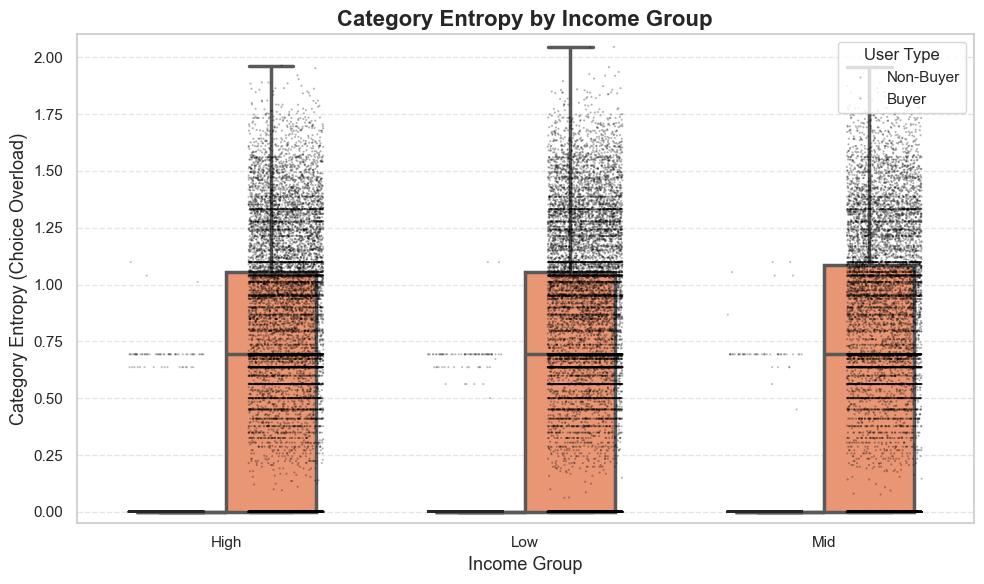

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style='whitegrid', context='notebook', palette='Set2')

plt.figure(figsize=(10, 6))

# Base boxplot
sns.boxplot(
    data=df[df['income_group'] != 99],
    x='income_group_label',
    y='category_entropy',
    hue='is_buyer',
    linewidth=2.5,
    fliersize=0,  # hide outliers since we'll show them manually
    width=0.6
)

# Overlay jittered points (outliers & spread)
sns.stripplot(
    data=df[df['income_group'] != 99],
    x='income_group_label',
    y='category_entropy',
    hue='is_buyer',
    dodge=True,
    alpha=0.3,
    color='black',
    jitter=0.25,
    marker='.',
    size=3
)

# Beautify legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), ['Non-Buyer', 'Buyer'], title="User Type", loc='upper right')

# Titles and labels
plt.title("Category Entropy by Income Group", fontsize=16, weight='bold')
plt.xlabel("Income Group", fontsize=13)
plt.ylabel("Category Entropy (Choice Overload)", fontsize=13)

# Adjust ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-0.05, 2.1)

# Add subtle grid and tighten layout
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()